# 收入分类分析

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#数据集描述" data-toc-modified-id="数据集描述-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>数据集描述</a></span><ul class="toc-item"><li><span><a href="#数据来源" data-toc-modified-id="数据来源-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>数据来源</a></span></li><li><span><a href="#变量含义" data-toc-modified-id="变量含义-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>变量含义</a></span></li></ul></li><li><span><a href="#数据预处理" data-toc-modified-id="数据预处理-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>数据预处理</a></span><ul class="toc-item"><li><span><a href="#数据集基本信息" data-toc-modified-id="数据集基本信息-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>数据集基本信息</a></span></li><li><span><a href="#删掉离散变量前的空格" data-toc-modified-id="删掉离散变量前的空格-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>删掉离散变量前的空格</a></span></li><li><span><a href="#变量选择" data-toc-modified-id="变量选择-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>变量选择</a></span></li><li><span><a href="#转换数据格式" data-toc-modified-id="转换数据格式-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>转换数据格式</a></span></li><li><span><a href="#空值处理" data-toc-modified-id="空值处理-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>空值处理</a></span></li></ul></li><li><span><a href="#数据统计分析+可视化" data-toc-modified-id="数据统计分析+可视化-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>数据统计分析+可视化</a></span><ul class="toc-item"><li><span><a href="#数据统计分析" data-toc-modified-id="数据统计分析-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>数据统计分析</a></span></li><li><span><a href="#数据可视化分析" data-toc-modified-id="数据可视化分析-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>数据可视化分析</a></span></li></ul></li><li><span><a href="#数据预测或分类分析(多种方法对比分析，图形化结果展示分析等)" data-toc-modified-id="数据预测或分类分析(多种方法对比分析，图形化结果展示分析等)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>数据预测或分类分析(多种方法对比分析，图形化结果展示分析等)</a></span></li></ul></div>

## 数据集描述

### 数据来源
   - 数据来源: https://archive.ics.uci.edu/ml/datasets/adult
   - 数据描述: https://www.kaggle.com/uciml/adult-census-income

### 变量含义
   - age: 年龄 
   - workclass: 工作阶级，包括以下几个选项：Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
   - fnlwgt: continuous. final weight. In other words, this is the number of people the census believes the entry represents [被赋予的权重]
   - education: 最高教育水平，包括以下几个选项Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
   - education-num:受教育的年数 continuous,numbers of years of education in total 
   - marital-status:婚姻状况 Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
   - occupation: 职业状况Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
   - relationship: 家庭成员相关Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
   - race:种族 White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 
   - sex:性别Female, Male. 
   - capital-gain: 收入外获得，continuous. income from investment sources other than wage/salary.
   - capital-loss: 收入外损失，continuous. income from investment sources other than wage/salary.
   - hours-per-week: 家务时间，continuous. 
   - native-country: 种族国家，United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador,Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.


In [1]:
# 导入分析所需要的包
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import missingno as msno 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix
%matplotlib inline 

In [2]:
# 导入数据集
df = pd.read_excel('income.xlsx')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## 数据预处理

### 数据集基本信息

In [3]:
# 查看所有数据集信息
df.describe(include='all')

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
count,32561.000000,30725,3.256100e+04,32561,32561.000000,32561,30718,32561,32561,32561,32561.000000,32561.000000,32561.000000,31978,32561
unique,NaN,8,NaN,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


### 删掉离散变量前的空格

In [4]:
#去掉空格
def remove_strip(df,col):
    df[col] = df[col].str.lstrip()

In [5]:
cols = df.loc[:,df.dtypes=='object'].columns.tolist()
for col in cols:
    remove_strip(df,col)

### 变量选择
1. 重复意义变量保留连续变量或者独立数量较少的 - educaiton和`education-num`,`workclass`和occupation
2. 无意义变量：fnlwgt
3. 新变量选择【native country变为美国和非美国】

In [6]:
# 新变量的df
new_df = df.drop(columns = ['fnlwgt','education','occupation'])

#基于大多数国家都是美国，将国家转变成为美国和非美国的二元变量
#其中1代表美国 0代表非美国
new_df['native-country'] = new_df['native-country'].apply(
    lambda x: 1 if x == 'United-States' else 0)

#查看数据集
new_df.head()

,age,workclass,education-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,13,Never-married,Not-in-family,White,Male,2174,0,40,1,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Husband,White,Male,0,0,13,1,<=50K
2,38,Private,9,Divorced,Not-in-family,White,Male,0,0,40,1,<=50K
3,53,Private,7,Married-civ-spouse,Husband,Black,Male,0,0,40,1,<=50K
4,28,Private,13,Married-civ-spouse,Wife,Black,Female,0,0,40,0,<=50K


### 转换数据格式

In [7]:
# 将离散变量转换为category格式
category_cols = new_df.loc[:,new_df.dtypes=='object'].columns.tolist()
for col in category_cols:
    new_df[col] = new_df[col].astype('category')

In [8]:
# 将目标变量 income转换成为0-1格式
# 其中0表示小于50k 1表示大于50k
new_df['income'] = new_df['income'].str.replace('<=50K','0')
new_df['income'] = new_df['income'].str.replace('>50K','1')
new_df['income'] = new_df['income'].astype('int')

# 将sex变量转换成为0-1格式
# 其中0表示小于male 1表示female
new_df['sex'] = new_df['sex'].str.replace('Male','0')
new_df['sex'] = new_df['sex'].str.replace('Female','1')
new_df['sex'] = new_df['sex'].astype('int')

new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             32561 non-null  int64   
 1   workclass       30725 non-null  category
 2   education-num   32561 non-null  int64   
 3   marital-status  32561 non-null  category
 4   relationship    32561 non-null  category
 5   race            32561 non-null  category
 6   sex             32561 non-null  int64   
 7   capital-gain    32561 non-null  int64   
 8   capital-loss    32561 non-null  int64   
 9   hours-per-week  32561 non-null  int64   
 10  native-country  32561 non-null  int64   
 11  income          32561 non-null  int64   
dtypes: category(4), int64(8)
memory usage: 2.1 MB


### 空值处理

/Users/matsujun/opt/anaconda3/lib/python3.8/site-packages/missingno/missingno.py:60: UserWarning: Plotting a sparkline on an existing axis is not currently supported. To remove this warning, set sparkline=False.
  warnings.warn(


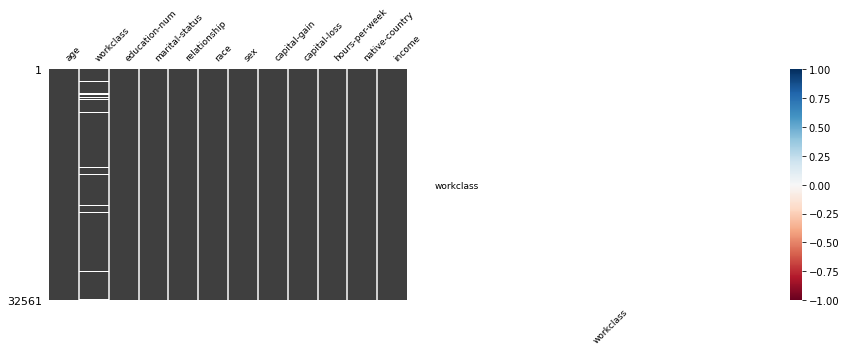

In [9]:
# 空值可视化
fig,(ax1,ax2) = plt.subplots(1,2,figsize = (12,5))

msno.matrix(new_df,labels=True,figsize=(6,5),fontsize=9,ax = ax1)
msno.heatmap(new_df,figsize = (6,5),fontsize=9,labels = True,ax = ax2)

plt.tight_layout()
plt.show()

从图上看主要空置在workclass和native_country,由于数量不是很多，所以用众数对其进行填充

In [10]:
# 用众数填充空值
new_df['workclass'] = new_df['workclass'].fillna(new_df['workclass'].mode()[0])

## 数据统计分析+可视化
### 数据统计分析

In [11]:
# 离散变量基本信息
new_df.describe(include='all')

,age,workclass,education-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
count,32561.000000,32561,32561.000000,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
unique,NaN,8,NaN,7,6,5,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Private,NaN,Married-civ-spouse,Husband,White,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24532,NaN,14976,13193,27816,NaN,NaN,NaN,NaN,NaN,NaN
mean,38.581647,NaN,10.080679,NaN,NaN,NaN,0.330795,1077.648844,87.303830,40.437456,0.895857,0.240810
std,13.640433,NaN,2.572720,NaN,NaN,NaN,0.470506,7385.292085,402.960219,12.347429,0.305451,0.427581
min,17.000000,NaN,1.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,NaN,9.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,40.000000,1.000000,0.000000
50%,37.000000,NaN,10.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,40.000000,1.000000,0.000000
75%,48.000000,NaN,12.000000,NaN,NaN,NaN,1.000000,0.000000,0.000000,45.000000,1.000000,0.000000


### 数据可视化分析

/Users/matsujun/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='income', ylabel='count'>

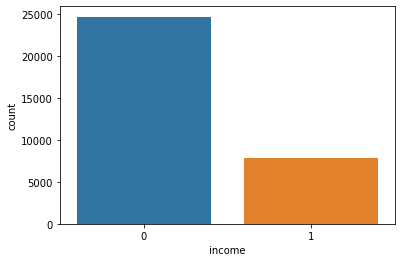

In [12]:
# income分布
sns.countplot(new_df['income'])

<AxesSubplot:>

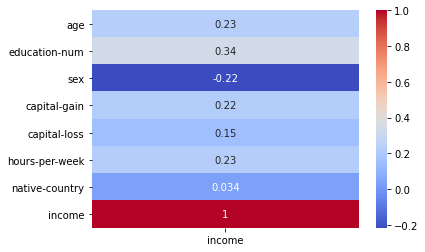

In [13]:
# 连续变量和income的关系
sns.heatmap(new_df.corr()[['income']],annot = True,cmap = 'coolwarm')

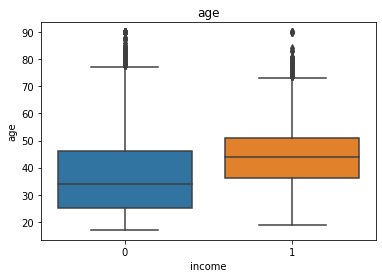

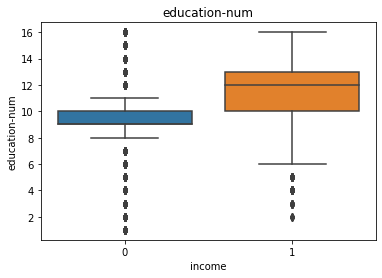

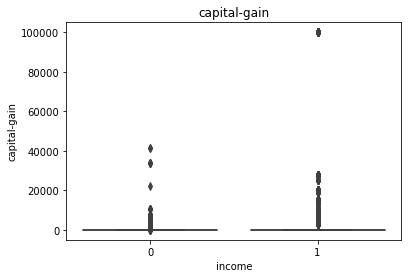

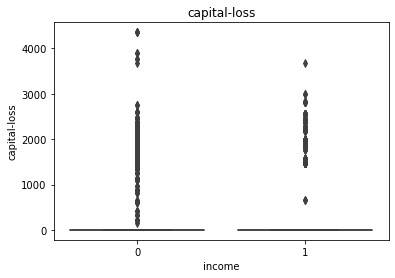

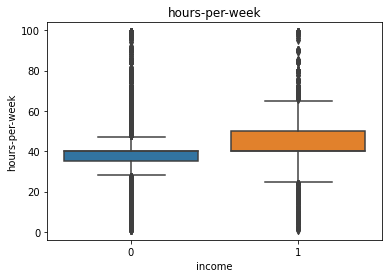

In [14]:
# 连续变量关于income的分布
box_cols = [
    'age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week'
]

for col in box_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=new_df, x='income', y=col)
    plt.title(col)
    plt.show()

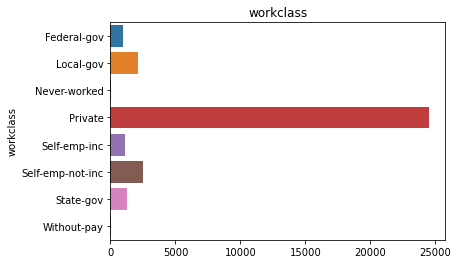

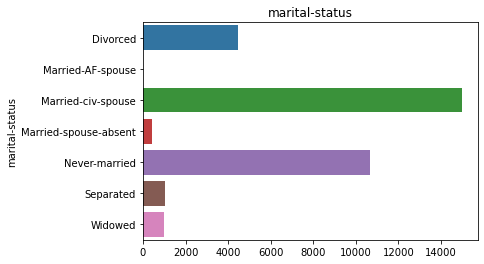

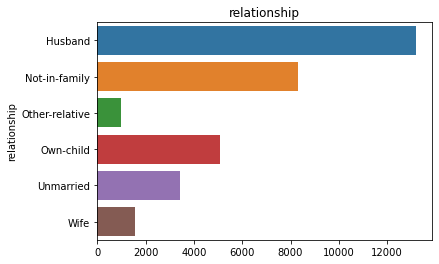

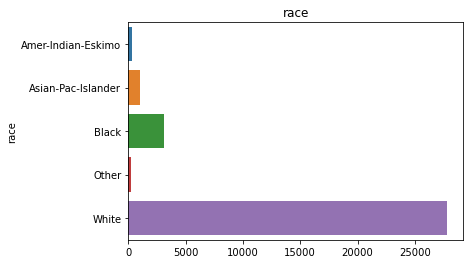

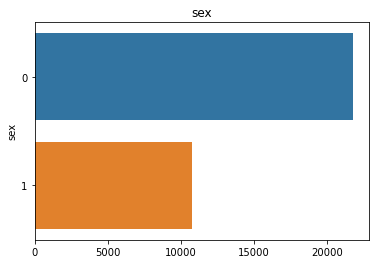

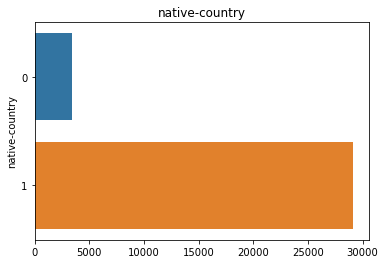

In [15]:
#离散变量分布
discrete_cols = ['workclass','marital-status','relationship','race','sex','native-country']
for col in discrete_cols:
    plt.figure(figsize = (6,4))
    sns.countplot(data = new_df,y = col)
    plt.title(col)
    plt.xlabel('')
    plt.show()

<Figure size 432x288 with 0 Axes>

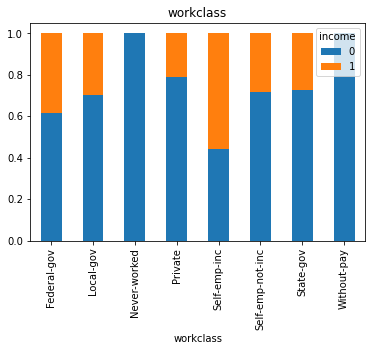

<Figure size 432x288 with 0 Axes>

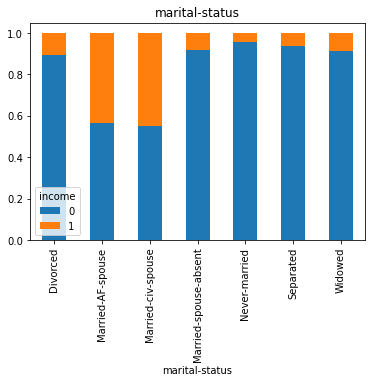

<Figure size 432x288 with 0 Axes>

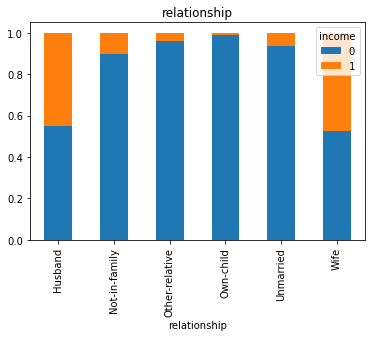

<Figure size 432x288 with 0 Axes>

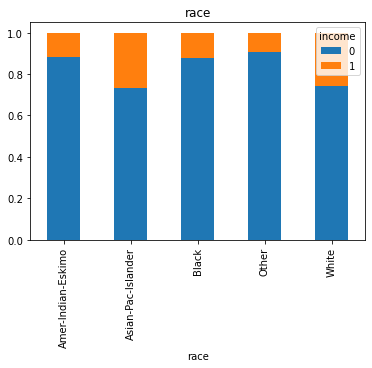

<Figure size 432x288 with 0 Axes>

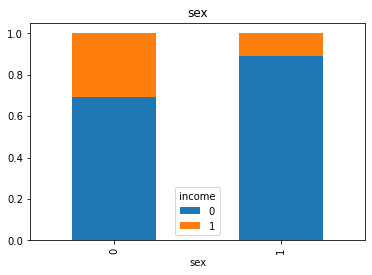

<Figure size 432x288 with 0 Axes>

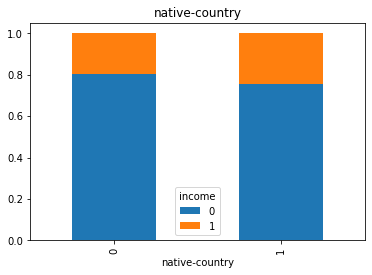

In [16]:
# 卡方检验
for col in discrete_cols:
    plt.figure(figsize = (6,4))
    new_df.groupby(col)['income'].value_counts(
        normalize=True).sort_index().unstack().plot.bar(stacked=True)
    plt.title(col)
    plt.show()

## 数据预测或分类分析(多种方法对比分析，图形化结果展示分析等)

In [17]:
x = pd.get_dummies(new_df).drop(columns = 'income')
y = new_df['income']

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 72)

In [19]:
#决策树
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt.score(x_test,y_test)

0.8248541304125294

In [20]:
#逻辑回归
lr = LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

/Users/matsujun/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8071450506704883

In [21]:
#knn
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.8464530658204524

In [22]:
pd.DataFrame(dt.feature_importances_, index=x.columns,
             columns=['Importance']).sort_values('Importance', ascending=False).head(5)

,Importance
marital-status_Married-civ-spouse,0.226166
age,0.182511
education-num,0.158587
capital-gain,0.134787
hours-per-week,0.106309


从结果来看，knn的正确率最高，且解释力最高的五个变量如下：
- marital status
- age
- education
- capital-gain
- hours-per-week